# (Dataset Exploration Title)
## by (your name here)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Data Wrangling

#### Assess
- Erroreous data type for `start_station_id`, `end_station_id`, `bike_id`, `member_birth_year`, `member_gender`, `bike_start_for_all_trip`, `start_time`, `end_time`, `user_type`
-`member_birth_year` minimum year is 1878, which is impossible.

#### Clean

Change `start_station_id`, `end_station_id`, `bike_id` to `object` type

Change `member_birth_year` to `Int64`

In [6]:
df['member_birth_year'] = df['member_birth_year'].astype('Int64')
df.member_birth_year.dtype

Int64Dtype()

In [7]:
for col in ['start_station_id', 'end_station_id', 'bike_id']:
    df[col] = df[col].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  object 
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  object 
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  object 
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  Int64  
 14  memb

Change `member_gender`, `bike_start_for_all_trip`, `user_type` to `categorical` type

In [8]:
for col in ['member_gender', 'bike_share_for_all_trip', 'user_type']:
    df[col] = df[col].astype("category")

Change `start_time`, `end_time` to `Datetime` type

In [9]:
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.start_time)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

Remove row with impossible birth year. I assume 1919 (age 100) as the cutoff year. People with age 100 or above are unlikely to rent a share bike.

In [40]:
df = df[df['member_birth_year'] > 1919]

In [47]:
sum(df['member_birth_year'].isna())

0

In [48]:
sum(df['member_birth_year'] <=1919)

0

### What is the structure of your dataset?

This dataset record bike-sharing usage data around greater San Francisco Bay Area. 

### What is/are the main feature(s) of interest in your dataset?

1. When is the most popular time for bike rental in terms of time of day, weeks and months.
2. Is there any correlation between member's age, gender and trip length?
3. Is there any distinct usage pattern for causal riders and subscribers? 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [11]:
# get start time day of week
df['start_time_day_of_week'] = df.start_time.dt.dayofweek + 1
# get start time hour
df['start_time_hour'] = df.start_time.dt.hour

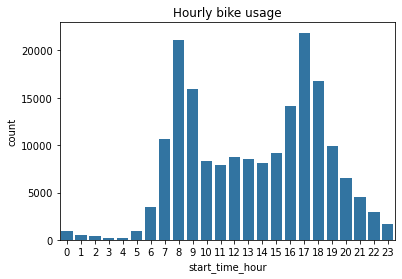

In [12]:
# hourly usage
sb.countplot(data=df, x='start_time_hour', color=sb.color_palette()[0]);
plt.title('Hourly bike usage');

The hourly bike usage graph peak at 8 and 17, indicating most bike usage occur during rush hours, where people use bike for commuting to and from work. We can further look at the pattern by separating weekday and weekend usage.

In [70]:
df_weekday = df[df['start_time_day_of_week'] <= 5]
df_weekend = df[df['start_time_day_of_week'] > 5]
df['is_weekday'] = df['start_time_day_of_week'] <=5

0         True
2         True
3         True
4         True
5         True
          ... 
183407    True
183408    True
183409    True
183410    True
183411    True
Name: is_weekday, Length: 175075, dtype: bool

C:\Users\steam\anaconda3\envs\twitter_dog\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


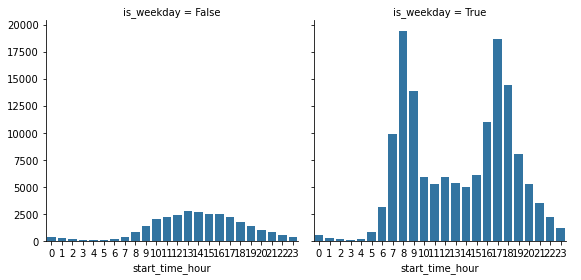

In [73]:
g = sb.FacetGrid(data=df, col='is_weekday', height = 4)
g.map(sb.countplot, 'start_time_hour')
g.add_legend();

The weekday hourly usage graph follow the same pattern with peaks at 8 and 17, while the weekend graph display a different shape: a bell shape during the day with peak around 13. Also the bike usage is significantly lower during weekend.

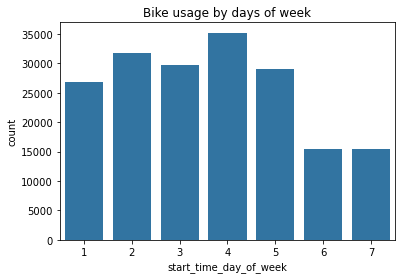

In [15]:
# df_four_weeks = df[df['start_time_day_of_week']]
sb.countplot(data=df, x='start_time_day_of_week', color=sb.color_palette()[0]);
plt.title('Bike usage by days of week');

Bike usage on weekend are less than those on weekdays, suggesting the bikes are more likely to be used for commuting rather than lesuire.

In [16]:
# start_time by day
df_by_day = df.groupby(pd.Grouper(key='start_time', freq='W')).count().bike_id.reset_index()
df_by_day.rename(columns={'bike_id':'count'}, inplace=True)
# sb.barplot(data=df_by_day, x='start_time', y='count');

Next, let's look at riding duration distribution.

In [17]:
# convert to riding minutes for easier interpretation
df['duration_minute'] = df.duration_sec / 60
df['duration_minute']

0          869.750000
1          708.683333
2         1030.900000
3          608.166667
4           26.416667
             ...     
183407       8.000000
183408       5.216667
183409       2.350000
183410       2.316667
183411       4.516667
Name: duration_minute, Length: 183412, dtype: float64

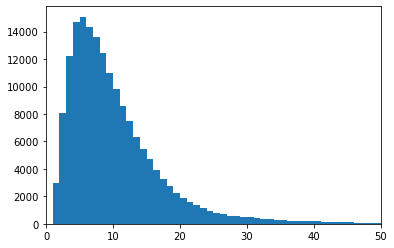

In [55]:
bins = np.arange(0, 62, 1)
plt.hist(data=df, x='duration_minute', bins=bins);
plt.xlim(0, 50);

The graph shows a right-skew pattern, with peak around 5 minutes. It indicates most users use the bike for short commuting purpose rather than longer leisurely ride , which match the observation of hourly and weekly usage.

Male and Female count.

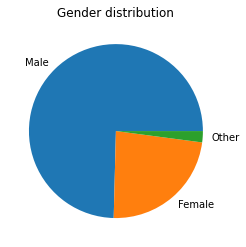

In [20]:
gender = df.member_gender.value_counts()
plt.pie(x=gender, labels=gender.index)
plt.title('Gender distribution');

Three quarters of bike users are male. 

### User demographic

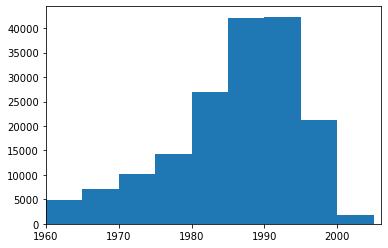

In [54]:
bins = np.arange(1920, df.member_birth_year.max()+5, 5)
plt.hist(data=df.dropna(), x='member_birth_year', bins=bins)
plt.xlim(1960, df.member_birth_year.max()+5);

User count follow a right-skew pattern with peak around 1985 to 1995.

In [58]:
df.user_type.value_counts()

Subscriber    158449
Customer       16626
Name: user_type, dtype: int64

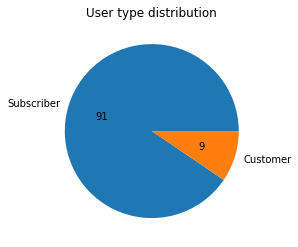

In [65]:
user_type = df.user_type.value_counts()
plt.pie(x=user_type, labels=user_type.index, autopct="%.f")
plt.title('User type distribution');

The majority of users are subscriber.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

From the above analysis, we can conclude that most users are born between 1985-1995, male, subscribers and using the bike for commuting purpose. Now I would like to look at the same statistic by different memeber types. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

C:\Users\steam\anaconda3\envs\twitter_dog\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


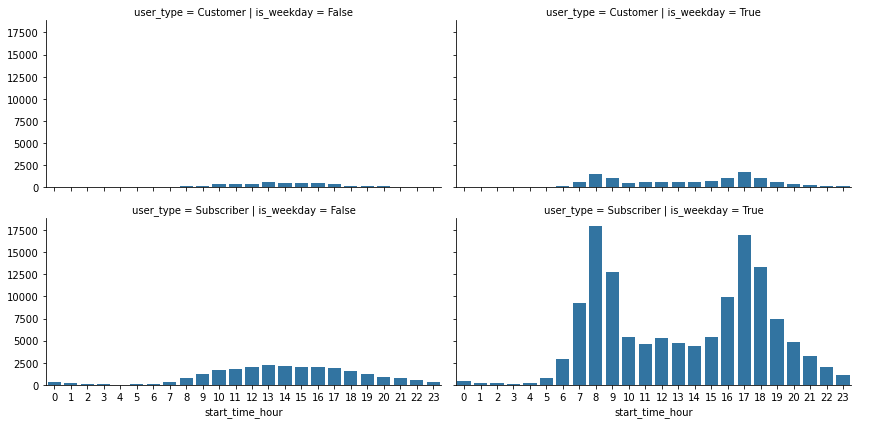

In [75]:
g = sb.FacetGrid(data=df, row='user_type', col='is_weekday', aspect=2)
g.map(sb.countplot, 'start_time_hour')
g.add_legend();

Subscriber and customer share the same hourly usage patter, with significantly less usage for customers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!